## Agenda

0. Merge Two dataFrames
1. Introduction to IMDB use case
2. Merging movies & directors datasets
3. IMDB data exploration (Post-read)
4. apply()
5. groupby()
  - Group based Aggregation
  - Group based Filtering
  - Group based Apply

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
users=pd.DataFrame({"userid":[1,2,3],"name":["Sharadh","Shahid","Khusalli"]})

In [ ]:
users

,userid,name
0,1,Sharadh
1,2,Shahid
2,3,Khusalli


In [ ]:
msgs = pd.DataFrame({"userid":[1, 1, 2, 4], "msg":['hmm', "acha", "theek hai", "nice"]})
msgs

,userid,msg
0,1,hmm
1,1,acha
2,2,theek hai
3,4,nice


In [ ]:
pd.concat([users,msgs],axis=0)

,userid,name,msg
0,1,Sharadh,NaN
1,2,Shahid,NaN
2,3,Khusalli,NaN
0,1,NaN,hmm
1,1,NaN,acha
2,2,NaN,theek hai
3,4,NaN,nice


In [ ]:
pd.concat([users,msgs],axis=1)

,userid,name,userid,msg
0,1.0,Sharadh,1,hmm
1,2.0,Shahid,1,acha
2,3.0,Khusalli,2,theek hai
3,NaN,NaN,4,nice


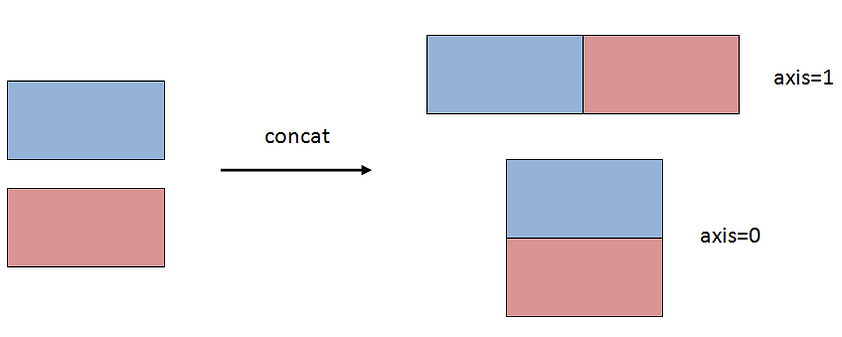

### Merge

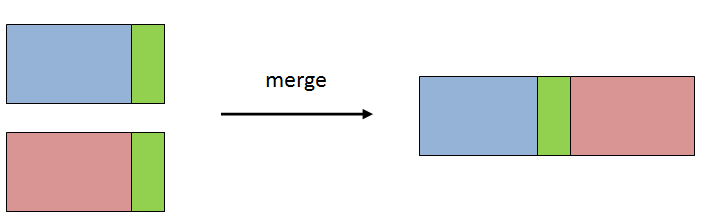

In [ ]:
users

,userid,name
0,1,Sharadh
1,2,Shahid
2,3,Khusalli


In [ ]:
msgs

,userid,msg
0,1,hmm
1,1,acha
2,2,theek hai
3,4,nice


In [ ]:
pd.merge(users,msgs,on="userid",how="inner")

,userid,name,msg
0,1,Sharadh,hmm
1,1,Sharadh,acha
2,2,Shahid,theek hai


In [ ]:
pd.merge(users, msgs, on="userid", how="left")

,userid,name,msg
0,1,Sharadh,hmm
1,1,Sharadh,acha
2,2,Shahid,theek hai
3,3,Khusalli,NaN


In [ ]:
pd.merge(users, msgs, on="userid", how="right")

,userid,name,msg
0,1,Sharadh,hmm
1,1,Sharadh,acha
2,2,Shahid,theek hai
3,4,NaN,nice


In [ ]:
pd.merge(users, msgs, on="userid", how="outer")

,userid,name,msg
0,1,Sharadh,hmm
1,1,Sharadh,acha
2,2,Shahid,theek hai
3,3,Khusalli,NaN
4,4,NaN,nice


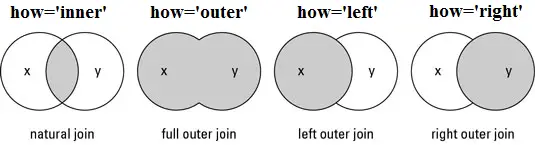

In [ ]:
temp_df=pd.merge(users,msgs,on="userid",how="inner")
print(temp_df)
temp_df_1=pd.merge(temp_df,msgs,on="userid",how="outer")

   userid     name        msg
0       1  Sharadh        hmm
1       1  Sharadh       acha
2       2   Shahid  theek hai


,userid,name,msg_x,msg_y
0,1,Sharadh,hmm,hmm
1,1,Sharadh,hmm,acha
2,1,Sharadh,acha,hmm
3,1,Sharadh,acha,acha
4,2,Shahid,theek hai,theek hai
5,4,NaN,NaN,nice


In [ ]:
# df_final=df1.merge(df2,on="userid").merge(df3,on="userid")
# pd.concat([df1,df2,df3])

In [ ]:
users

,userid,name
0,1,Sharadh
1,2,Shahid
2,3,Khusalli


In [ ]:
users.columns

Index(['userid', 'name'], dtype='object')

In [ ]:
users.columns=['id', 'name']

In [ ]:
users

,id,name
0,1,Sharadh
1,2,Shahid
2,3,Khusalli


In [ ]:
msgs

,userid,msg
0,1,hmm
1,1,acha
2,2,theek hai
3,4,nice


In [ ]:
pd.merge(users,msgs,left_on="id",right_on="userid",how="inner")

,id,name,userid,msg
0,1,Sharadh,1,hmm
1,1,Sharadh,1,acha
2,2,Shahid,2,theek hai


## Find the users for whom there is no Msg

In [ ]:
temp_df=pd.merge(users,msgs,left_on='id',right_on="userid",how="left")
temp_df

,id,name,userid,msg
0,1,Sharadh,1.0,hmm
1,1,Sharadh,1.0,acha
2,2,Shahid,2.0,theek hai
3,3,Khusalli,NaN,NaN


In [ ]:
msk=temp_df["msg"].isnull()
temp_df[msk]

,id,name,userid,msg
3,3,Khusalli,NaN,NaN


In [ ]:
temp_df[temp_df['userid']=='Nan']

,id,name,userid,msg


IMDB dataset

In [ ]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 72.5MB/s]


In [ ]:
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 72.0MB/s]


In [ ]:
movies=pd.read_csv('movies.csv')

In [ ]:
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
movies.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
movies.shape

(1465, 11)

In [ ]:
directors=pd.read_csv("directors.csv")
directors.head()

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male


In [ ]:
directors.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
directors.shape

(2349, 3)

# How many unique directors i have in my movies df?

In [ ]:
movies["director_id"].nunique()

199

In [ ]:
directors["id"].nunique()

2349

In [ ]:
# How can we check if all director_id values from movies are present in id column of direcotrs df?

movies['director_id'].isin(directors['id'])

,director_id
0,True
1,True
2,True
3,True
4,True
...,...
1460,True
1461,True
1462,True
1463,True


In [ ]:
np.all(movies['director_id'].isin(directors['id']))

np.True_

In [ ]:
data=pd.merge(movies,directors,left_on="director_id",right_on="id",how="left")

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male


In [ ]:
data[data["title"]=="Avatar"]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male


All movies tiltle which were released in 2007

In [ ]:
data[data["year"]==2007]["title"]

,title
1,Pirates of the Caribbean: At World's End
4,Spider-Man 3
17,The Golden Compass
39,Rush Hour 3
51,Evan Almighty
68,Transformers
72,I Am Legend
91,Beowulf
108,The Bourne Ultimatum
133,Fantastic 4: Rise of the Silver Surfer


Apply()

In [ ]:
data["gender"].unique()

array(['Male', nan, 'Female'], dtype=object)

In [ ]:
def encode(data):
  if data=="Male":
    return 0
  else:
    return 1

In [ ]:
data['gender']=data["gender"].apply(encode)

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,0
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,0
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,0
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,0
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,0


### profit = revenue- budget

In [ ]:
def prof(x):
  return x['revenue']-x['budget']

data['profit']=data[['revenue','budget']].apply(prof,axis=1)

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender,profit
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,0,2550965087
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,0,661000000
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,0,635674609
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,0,834939099
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,0,632871626


In [ ]:
data[data["year"]]